In [1]:
#Technical Analysis Systems (Apostolos Dasilas)
#Taouktsis Xenofon (dai19312)
#Υπολογισμοί Ταλαντωτές Williams(%R) and Stochastic(%K)
#Δεδομένα από το [investing.com]
#Τα δεδομένα (.csv) όπως τα κατεβάζουμε απευθείας από το investing.com
#Το αρχείο θα έχει όνομα συμβόλου και μετατροπή από π.χ. ETH.csv σε ETH_md.csv
#UPDATE 080120 - v2

**Εισαγωγή Functions**

In [2]:
#Βήμα 1 | Libraries Input
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

#Global
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Βήμα 2 | Upload Dataset Function
def upload_dataset():
    data_upload = files.upload()
    filename = list(data_upload.keys())[0]
    filename = re.sub(".csv", "", filename)
    return filename

In [4]:
#Βήμα 3 | Simple SMA with Plot Function
def sma_info(dataset, window_value, plot_values):
  tmp_sma = pd.DataFrame()
  tmp_sma['Price'] = dataset['Price'].rolling(window=window_value).mean()
  tmp_sma.columns = ['Price'+'_SMA'+ str(window_value)]
  if plot_values == True:
      plt.plot(tmp_sma)
      plt.plot(dataset['Price'])
      plt.show()
  return tmp_sma

In [5]:
#Βήμα 4 | Williams(%R) and Stochastic(%K) calculation Formula
def williams_stochastic_calculation(dataset, window_value):
    tmp_a = pd.DataFrame()
    tmp_a['High'] = dataset['High'].rolling(window=window_value).max()
    tmp_a.columns = ['Highest_High'+'_W'+ str(window_value)]

    tmp_b = pd.DataFrame()
    tmp_b['Low'] = dataset['Low'].rolling(window=window_value).min()
    tmp_b.columns = ['Lowest_Low'+'_W'+ str(window_value)]

    #tmp_stochastic  = pd.DataFrame(100+tmp_williams.iloc[:,0])
    tmp_stochastic  = pd.DataFrame(((dataset['Price'] - tmp_b.iloc[:,0]) / (tmp_a.iloc[:,0]-tmp_b.iloc[:,0])) * (100))
    tmp_stochastic.columns = ['Stochastic_(%K)'+'_W'+ str(window_value)]
    tmp_stochastic = round(tmp_stochastic,3)

    #tmp_williams = pd.DataFrame(((tmp_a.iloc[:,0] - dataset['Price']) / (tmp_a.iloc[:,0]-tmp_b.iloc[:,0])) * (-100))
    tmp_williams = pd.DataFrame(tmp_stochastic.iloc[:,0]-100)
    tmp_williams.columns = ['Williams_(%R)'+'_W'+ str(window_value)]
    tmp_williams = round(tmp_williams,3)

    result_values = pd.DataFrame()
    result_values = pd.concat([dataset, tmp_a, tmp_b, tmp_williams, tmp_stochastic], axis=1)
    drop_columns = ['Volume']
    result_values = result_values.drop(columns = drop_columns)

    return result_values

In [6]:
#Βήμα 5 | Plot Williams(%R) and Stochastic(%K)
def total_plot_metrics(metric_results):
    symbol_name = re.sub("_md", "", filename)
    fig1, ax1 = plt.subplots(figsize=(15, 5))

    #Symbol Price Plot
    metric_results = metric_results.set_index(pd.DatetimeIndex(metric_results['Date'].values))
    plt.plot(metric_results['Price'], label = symbol_name, alpha = 0.80, color = 'violet')
    plt.title('Symbol: ' + symbol_name + ' [Price History]')
    plt.ylabel('Price USD')
    #plt.legend(loc=2, prop={'size': 7})
    ax1.set_xlim([metric_results.index[0], metric_results.index[len(metric_results)-1]])
    plt.tight_layout()
    plt.show()


    #Williams (%R) Plot
    fig2, ax2 = plt.subplots(figsize=(15, 5))
    willimas_name = metric_results.columns[7]
    plt.plot(metric_results[willimas_name], label = willimas_name, alpha = 0.80, color = 'red')

    plt.axhline(-20, linestyle='dotted',color = 'forestgreen')
    plt.axhline(-80, linestyle='dotted', color = 'red')

    plt.ylabel(willimas_name +' values')
    ax2.set_xlim([metric_results.index[0], metric_results.index[len(metric_results)-1]])
    #plt.legend(loc=2, prop={'size': 7})
    plt.tight_layout()
    plt.show()
    ###

    #Stochastic (%K) Plot
    fig2, ax2 = plt.subplots(figsize=(15, 5))
    stochastic_name = metric_results.columns[8]
    plt.plot(metric_results[stochastic_name], label = stochastic_name, alpha = 0.80, color = 'red')

    plt.axhline(20, linestyle='dotted',color = 'forestgreen')
    plt.axhline(80, linestyle='dotted', color = 'red')

    plt.ylabel(stochastic_name +' values')
    ax2.set_xlim([metric_results.index[0], metric_results.index[len(metric_results)-1]])
    #plt.legend(loc=2, prop={'size': 7})
    plt.tight_layout()
    plt.show()
    ###
    return


**Απευθείας CSV to CSV_md - INVESTING.COM**

In [7]:
#Βήμα SOS
#Direct CSV to CSV_md (investing.com)
def md_csv_dataset(filename):
    chart = pd.read_csv(filename+".csv",
                        sep = ',')
    n_col = len(chart.columns)
    chart = chart.drop(chart.columns[n_col-1],axis=1)

    if len(chart.columns) < 6 :
        chart['Volume'] = 0
        id = 1
    else :
        id = 0

    chart.columns = ['Date','Price',
                    'Open','High',
                    'Low','Volume']

    #Μορφή Ημερομηνίας
    chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')

    chart = chart.replace(',','', regex=True)
    chart = chart.replace('%','', regex=True)
    chart.iloc[:,1:6] = chart.iloc[:,1:6].replace('-','0', regex=True)

    chart['Date'] = chart['Date'].astype(np.datetime64)
    chart['Date'] = chart['Date'].dt.date
    chart['Price'] = chart['Price'].astype(np.float64)
    chart['Open'] = chart['Open'].astype(np.float64)
    chart['High'] = chart['High'].astype(np.float64)
    chart['Low'] = chart['Low'].astype(np.float64)

    if id!=1:
        for i in range(len(chart)):
            tmp_value = chart.iloc[i,5]
            if tmp_value != re.sub("K", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("K", "",tmp_value)) * 1000
            elif tmp_value != re.sub("M", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("M", "",tmp_value)) * 1000000
            elif  tmp_value != re.sub("B", "",tmp_value):
                chart.iloc[i,5] = np.float64(re.sub("B", "",tmp_value)) * 1000000000
        chart['Volume'] = chart['Volume'].astype(np.float64)
    else:
        #update 111220
        chart['Volume'] = 0 #Υπήρχε θέμα με το volume οπότε το θέτω με μηδέν ( 0 ) όταν δεν υπάρχει η στήλη από το investing.com
        #md_col = len(chart.columns)
        #chart = chart.drop(chart.columns[md_col-1],axis=1)

    chart.sort_values(by=['Date'], inplace=True, ascending=True)

    #update 081220
    chart.index = range(len(chart['Date']))

    return chart

**Αρχή Διαδικασιών Williams(%R) and Stochastic(%K)**

In [8]:
#Βήμα 1 | Upload .csv Dataset (.csv)
filename = upload_dataset()
filename
#Το αποτέλεσμα θα είναι π.χ. filename = "AAPL"

Saving INTC Ιστορικά Δεδομένα(2).csv to INTC Ιστορικά Δεδομένα(2).csv


'INTC Ιστορικά Δεδομένα(2)'

In [9]:
#Βήμα 2 | Creation of Dataset (load .csv file)
#Επιλογές Υποδιαστολής
#American xlsx επιλογή decimal_select = '.' εάν το csv έχει αποθηκευτεί με ( . )
#European xlsx επιλογή decimal_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#Επιλογή Διαχωρισμού Στηλών
#European xlsx sep_select = ';' εάν το csv έχει αποθηκευτεί με ( ; )
#American xlsx sep_select = ',' εάν το csv έχει αποθηκευτεί με ( , )

#decimal_select = ',' #Υποδιαστολή
#sep_select = ';' #Διαχωρισμός Στηλών

dataset = md_csv_dataset(filename)
dataset

<ipython-input-7-052c46b199ca>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chart.Date = pd.to_datetime(chart.Date).dt.strftime('%m-%d-%Y')


Date   Price    Open    High     Low        Volume
0    2022-01-11  2830.0  2880.0  2885.0  2789.0  4.442000e+09
1    2022-01-12  2983.0  3024.0  3048.0  2952.0  3.890000e+09
2    2022-02-11  2742.0  2827.0  2885.0  2741.0  5.196000e+09
3    2022-02-12  2941.0  2917.0  2943.0  2871.0  3.155000e+09
4    2022-03-11  2739.0  2745.0  2788.0  2717.0  3.968000e+09
..          ...     ...     ...     ...     ...           ...
248  2023-12-05  2895.0  2902.0  2910.0  2872.0  2.415000e+09
249  2023-12-06  3307.0  3140.0  3330.0  3136.0  5.967000e+09
250  2023-12-07  3398.0  3369.0  3408.0  3306.0  3.728000e+09
251  2023-12-09  3886.0  3865.0  4007.0  3865.0  5.465000e+09
252  2023-12-10  3684.0  3680.0  3722.0  3639.0  2.356000e+09

[253 rows x 6 columns]

In [10]:
#Βήμα 3 | Williams(%R) and Stochastic(%K) Results Analysis
window_value = 14
window_value = 14
williams_stochastic_results = williams_stochastic_calculation(dataset,window_value)

In [11]:
#Βήμα 4 | First 30 results
williams_stochastic_results.head(n=30)

Date   Price    Open    High     Low  Highest_High_W14  \
0   2022-01-11  2830.0  2880.0  2885.0  2789.0               NaN   
1   2022-01-12  2983.0  3024.0  3048.0  2952.0               NaN   
2   2022-02-11  2742.0  2827.0  2885.0  2741.0               NaN   
3   2022-02-12  2941.0  2917.0  2943.0  2871.0               NaN   
4   2022-03-11  2739.0  2745.0  2788.0  2717.0               NaN   
5   2022-04-11  2820.0  2757.0  2824.0  2741.0               NaN   
6   2022-05-12  2917.0  2942.0  2975.0  2889.0               NaN   
7   2022-06-12  2860.0  2919.0  2931.0  2834.0               NaN   
8   2022-07-11  2841.0  2836.0  2847.0  2789.0               NaN   
9   2022-07-12  2833.0  2828.0  2855.0  2815.0               NaN   
10  2022-08-11  2848.0  2875.0  2895.0  2793.0               NaN   
11  2022-08-12  2844.0  2832.0  2860.0  2807.0               NaN   
12  2022-09-11  2752.0  2822.0  2830.0  2752.0               NaN   
13  2022-09-12  2824.0  2839.0  2878.0  2819.0            3048.0   
14  2022-10-11  2976.0  2888.0  2983.0  2865.0            3048.0   
15  2022-10-18  2587.0  2674.0  2695.0  2554.0            2983.0   
16  2022-10-19  2600.0  2574.0  2625.0  2569.0            2983.0   
17  2022-10-20  2608.0  2615.0  2695.0  2594.0            2983.0   
18  2022-10-21  2697.0  2585.0  2705.0  2579.0            2983.0   
19  2022-10-24  2718.0  2675.0  2748.0  2652.0            2983.0   
20  2022-10-25  2741.0  2718.0  2756.0  2700.0            2983.0   
21  2022-10-26  2721.0  2719.0  2780.0  2699.0            2983.0   
22  2022-10-27  2627.0  2745.0  2759.0  2613.0            2983.0   
23  2022-10-28  2907.0  2817.0  2922.0  2786.0            2983.0   
24  2022-10-31  2843.0  2908.0  2918.0  2805.0            2983.0   
25  2022-11-11  3043.0  2892.0  3063.0  2887.0            3063.0   
26  2022-11-14  3035.0  3034.0  3099.0  3018.0            3099.0   
27  2022-11-15  3071.0  3109.0  3133.0  3017.0            3133.0   
28  2022-11-16  2953.0  3011.0  3023.0  2944.0            3133.0   
29  2022-11-17  2989.0  2907.0  2995.0  2900.0            3133.0   

    Lowest_Low_W14  Williams_(%R)_W14  Stochastic_(%K)_W14  
0              NaN                NaN                  NaN  
1              NaN                NaN                  NaN  
2              NaN                NaN                  NaN  
3              NaN                NaN                  NaN  
4              NaN                NaN                  NaN  
5              NaN                NaN                  NaN  
6              NaN                NaN                  NaN  
7              NaN                NaN                  NaN  
8              NaN                NaN                  NaN  
9              NaN                NaN                  NaN  
10             NaN                NaN                  NaN  
11             NaN                NaN                  NaN  
12             NaN                NaN                  NaN  
13          2717.0            -67.674               32.326  
14          2717.0            -21.752               78.248  
15          2554.0            -92.308                7.692  
16          2554.0            -89.277               10.723  
17          2554.0            -87.413               12.587  
18          2554.0            -66.667               33.333  
19          2554.0            -61.772               38.228  
20          2554.0            -56.410               43.590  
21          2554.0            -61.072               38.928  
22          2554.0            -82.984               17.016  
23          2554.0            -17.716               82.284  
24          2554.0            -32.634               67.366  
25          2554.0             -3.929               96.071  
26          2554.0            -11.743               88.257  
27          2554.0            -10.708               89.292  
28          2554.0            -31.088               68.912  
29          2569.0            -25.532               74.468

In [12]:
#Βήμα 5 | Last 30 results
williams_stochastic_results.tail(n=30)

Date   Price    Open    High     Low  Highest_High_W14  \
223  2023-09-27  3461.0  3392.0  3483.0  3388.0            3915.0   
224  2023-09-28  3518.0  3465.0  3566.0  3438.0            3915.0   
225  2023-09-29  3555.0  3565.0  3591.0  3515.0            3915.0   
226  2023-10-01  2944.0  2924.0  2951.0  2892.0            3915.0   
227  2023-10-02  2780.0  2763.0  2799.0  2733.0            3890.0   
228  2023-10-03  2722.0  2655.0  2752.0  2632.0            3852.0   
229  2023-10-04  3252.0  3260.0  3276.0  3220.0            3839.0   
230  2023-10-05  2997.0  3029.0  3040.0  2949.0            3810.0   
231  2023-10-07  3274.0  3187.0  3283.0  3177.0            3625.0   
232  2023-10-08  3468.0  3470.0  3509.0  3448.0            3591.0   
233  2023-10-10  3643.0  3614.0  3674.0  3581.0            3674.0   
234  2023-10-13  3597.0  3674.0  3679.0  3586.0            3679.0   
235  2023-10-16  3656.0  3614.0  3694.0  3608.0            3694.0   
236  2023-10-17  3606.0  3592.0  3635.0  3507.0            3694.0   
237  2023-10-18  3564.0  3552.0  3602.0  3545.0            3694.0   
238  2023-10-19  3567.0  3596.0  3636.0  3552.0            3694.0   
239  2023-11-01  2985.0  2968.0  2988.0  2900.0            3694.0   
240  2023-11-04  3235.0  3266.0  3311.0  3232.0            3694.0   
241  2023-11-05  2886.0  2960.0  2968.0  2882.0            3694.0   
242  2023-11-07  3330.0  3282.0  3336.0  3250.0            3694.0   
243  2023-11-08  3489.0  3446.0  3494.0  3436.0            3694.0   
244  2023-11-09  3859.0  3824.0  3874.0  3784.0            3874.0   
245  2023-11-10  3688.0  3662.0  3703.0  3638.0            3874.0   
246  2023-12-01  3029.0  2998.0  3038.0  2947.0            3874.0   
247  2023-12-04  3202.0  3277.0  3289.0  3196.0            3874.0   
248  2023-12-05  2895.0  2902.0  2910.0  2872.0            3874.0   
249  2023-12-06  3307.0  3140.0  3330.0  3136.0            3874.0   
250  2023-12-07  3398.0  3369.0  3408.0  3306.0            3874.0   
251  2023-12-09  3886.0  3865.0  4007.0  3865.0            4007.0   
252  2023-12-10  3684.0  3680.0  3722.0  3639.0            4007.0   

     Lowest_Low_W14  Williams_(%R)_W14  Stochastic_(%K)_W14  
223          3068.0            -53.601               46.399  
224          3364.0            -72.051               27.949  
225          3364.0            -65.336               34.664  
226          2892.0            -94.917                5.083  
227          2733.0            -95.938                4.062  
228          2632.0            -92.623                7.377  
229          2632.0            -48.633               51.367  
230          2632.0            -69.015               30.985  
231          2632.0            -35.347               64.653  
232          2632.0            -12.826               87.174  
233          2632.0             -2.975               97.025  
234          2632.0             -7.832               92.168  
235          2632.0             -3.578               96.422  
236          2632.0             -8.286               91.714  
237          2632.0            -12.241               87.759  
238          2632.0            -11.959               88.041  
239          2632.0            -66.761               33.239  
240          2632.0            -43.220               56.780  
241          2632.0            -76.083               23.917  
242          2882.0            -44.828               55.172  
243          2882.0            -25.246               74.754  
244          2882.0             -1.512               98.488  
245          2882.0            -18.750               81.250  
246          2882.0            -85.181               14.819  
247          2882.0            -67.742               32.258  
248          2872.0            -97.705                2.295  
249          2872.0            -56.587               43.413  
250          2872.0            -47.505               52.495  
251          2872.0            -10.661               89.339  
252        

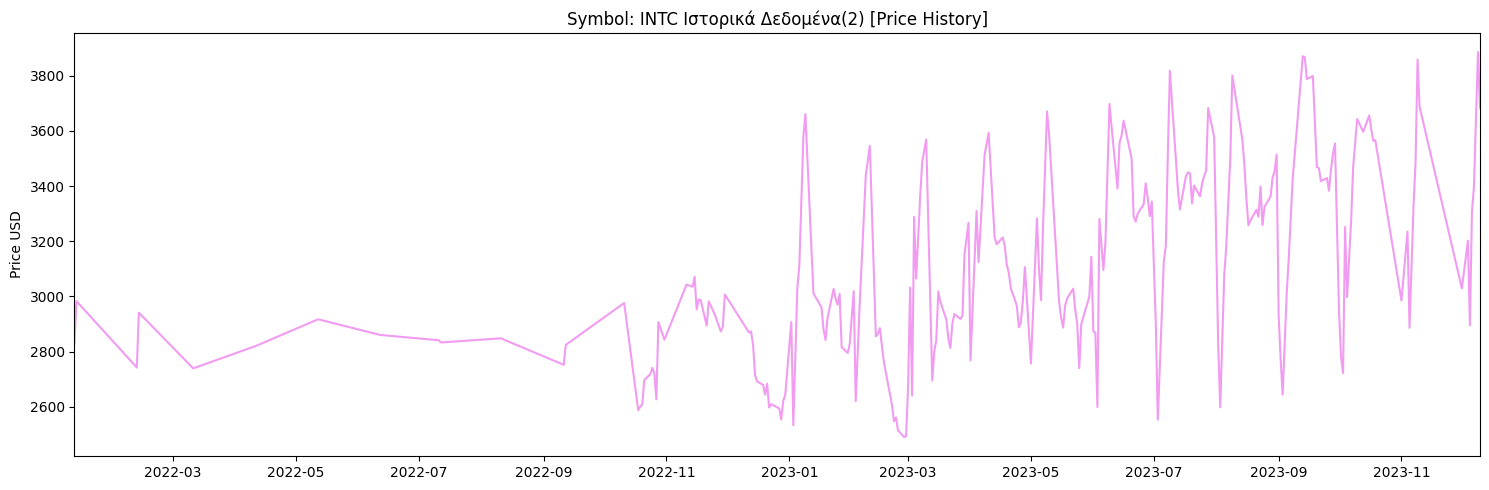

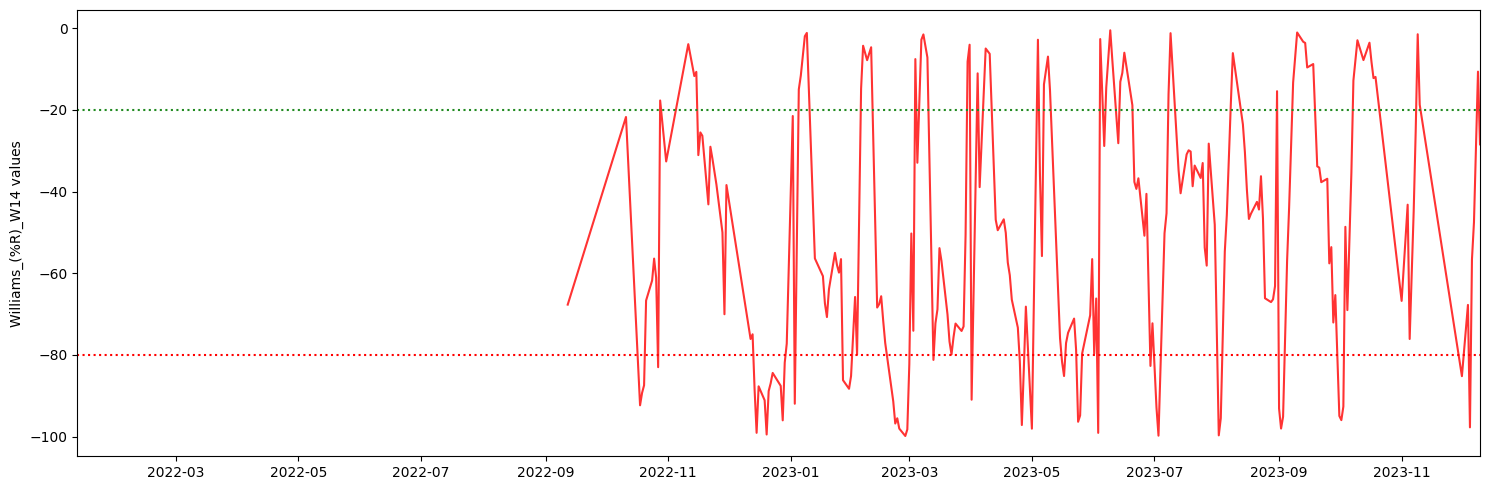

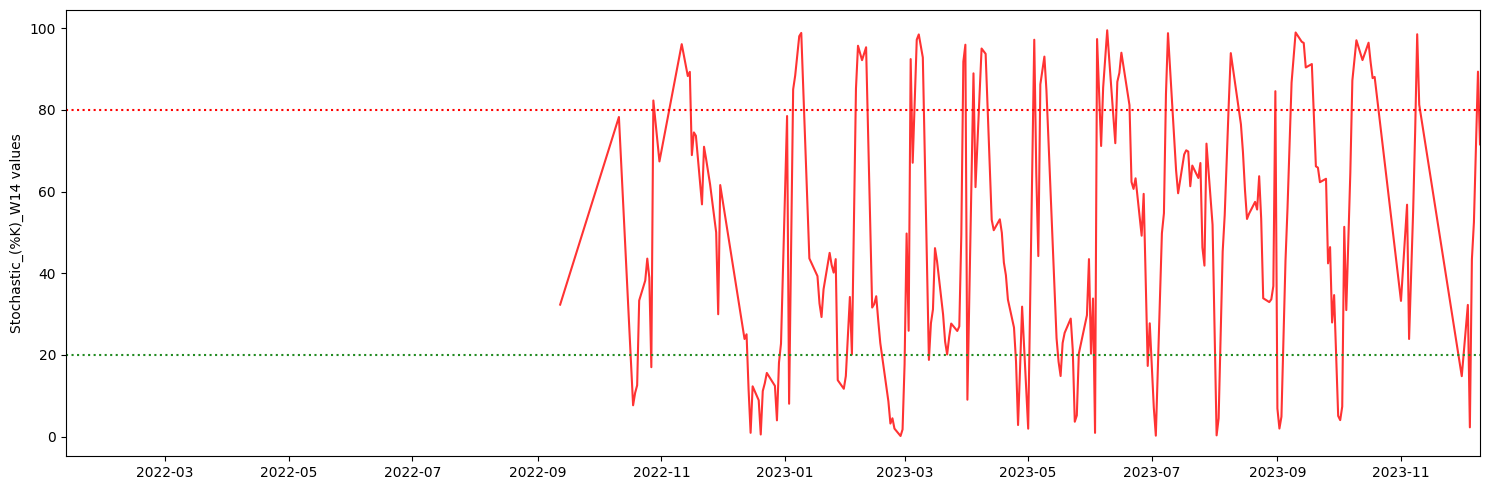

In [13]:
#Βήμα 6 | Williams(%R) and Stochastic(%K) Plot Analysis
#Williams(%R), >-20 overbought area AND <-80 oversought area
#Stochastic(%K), <-20 oversought area AND >80 overbought area

total_plot_metrics(williams_stochastic_results)